<IPython.core.display.Javascript object>


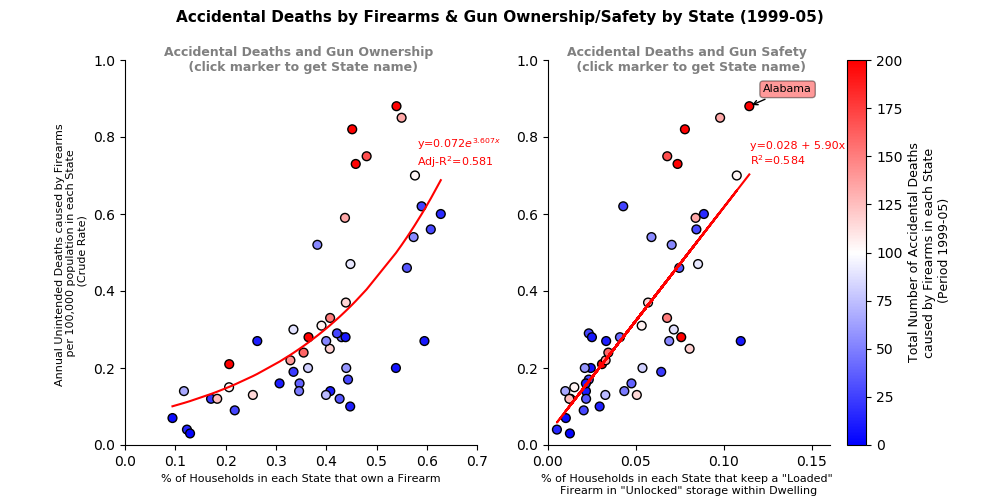

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib as mpl
from matplotlib import cm

#
#IMPORTANT NOTE: The data here is loaded into the Dataframe as series so the image can its features can be rendered on this Notebook"
#The second cell in this notebook shows how the values added to the df_adj were calculated and obtained. To successfully run
#the code of that second cell you will need to download the data from the CDC's website:
#     BRFSS survey Data for each year (2001, 2002, 2004 and 2017) https://www.cdc.gov/brfss/annual_data/annual_data.htm
#     WISQARS Fatal Injury Report Data https://webappa.cdc.gov/cgi-bin/broker.exe


#THIS PORTION OF THE CODE ADDS THE DATA SO THE CODE CAN RUN AND THE GRAPH RENDER
df_adj=pd.DataFrame()
df_adj['Crude Rate 1999-2005']=pd.Series([0.88,	0.27,	0.3,	0.7,	0.21,	0.16,	0.12,	0.27,	0.13,	0.25,	0.07,	0.46,	0.15,	0.31,	0.17,	0.28,	0.75,	0.82,	0.14,	0.09,	0.04,	0.13,	0.12,	0.85,	0.37,	0.56,	0.29,	0.19,	0.16,	0.14,	0.52,	0.12,	0.33,	0.2,	0.22,	0.47,	0.27,	0.24,	0.03,	0.59,	0.62,	0.73,	0.28,	0.1,	0.28,	0.2,	0.14,	0.54,	0.2,	0.6])
df_adj['Deaths 1999-05']=pd.Series([277,	12,	113,	132,	518,	49,	28,	15,	147,	151,	6,	43,	133,	134,	36,	53,	216,	258,	13,	35,	19,	93,	43,	171,	148,	36,	35,	29,	14,	84,	68,	160,	193,	9,	179,	116,	67,	204,	2,	171,	33,	297,	419,	16,	12,	104,	61,	69,	75,	21])
df_adj['Avg Ownership 2001-04']=pd.Series([0.539476934080175,	0.595019816102239,	0.334666628738366,	0.576194365617475,	0.207122174906103,	0.346843694344896,	0.170943037808656,	0.262878605726449,	0.254111912158435,	0.406898637583394,	0.0943369709377484,	0.560216453948451,	0.206801863005088,	0.39045737505794,	0.443195990574695,	0.43034248941814,	0.480166706756868,	0.451490995754429,	0.407892157781961,	0.218070364749997,	0.123101308894423,	0.399387655930639,	0.426473275604372,	0.549638693153177,	0.438844171118776,	0.607644088124618,	0.421197554104966,	0.334833778584636,	0.307088354906585,	0.117158809095372,	0.38221924343014,	0.183270788430598,	0.407564486461748,	0.538348195489432,	0.328664698898098,	0.447989042984108,	0.399761805102284,	0.354893994255865,	0.129272074337032,	0.437130423266695,	0.589382837897382,	0.458511053050574,	0.364680208935704,	0.447480933632918,	0.438261871516768,	0.363703787600216,	0.345938187611763,	0.573487564576164,	0.439619351953249,	0.627499448190645])
df_adj['Avg % Home with Loaded/Unlock Firearm 2002-04']=pd.Series([0.114445392138898,	0.109590472721464,	0.0715872717124739,	0.107324539145495,	0.0307993859084677,	0.0475407299560598,	0.0128854670970433,	0.0331710153363944,	0.0505890233537097,	0.0805580970575713,	0.0102724828371063,	0.0746786381774134,	0.0151056340368622,	0.0533513994747058,	0.0233194518806447,	0.0409954527554992,	0.0678513677079946,	0.0778802913199667,	0.0216912229959599,	0.0204276012098067,	0.00521465510603672,	0.0326998131029623,	0.0217858648642703,	0.0978707123169316,	0.0569547016514935,	0.0843996161003658,	0.0233113606405823,	0.0644217568362976,	0.021666978154178,	0.00997308662738296,	0.07038407769917,	0.0122678517874331,	0.0677501918777426,	0.0244651654109674,	0.0328919774909238,	0.0853513349176715,	0.0689721314132587,	0.034402700191834,	0.0125772262914219,	0.0839557875949905,	0.0428690697049424,	0.0737073546355294,	0.0757926877096437,	0.0294695240151976,	0.0251063780082617,	0.0537897166433066,	0.0434917012893531,	0.058889775254139,	0.0210487844050828,	0.0886497664673046])
df_adj['State Name']=pd.Series(['Alabama',	 'Alaska',	 'Arizona',	 'Arkansas',	 'California',	 'Colorado',	 'Connecticut',	 'Delaware',	 'Florida',	 'Georgia',	 'Hawaii',	 'Idaho',	 'Illinois',	 'Indiana',	 'Iowa',	 'Kansas',	 'Kentucky',	 'Louisiana',	 'Maine',	 'Maryland',	 'Massachusetts',	 'Michigan',	 'Minnesota',	 'Mississippi',	 'Missouri',	 'Montana',	 'Nebraska',	 'Nevada',	 'New Hampshire',	 'New Jersey',	 'New Mexico',	 'New York',	 'North Carolina',	 'North Dakota',	 'Ohio',	 'Oklahoma',	 'Oregon',	 'Pennsylvania',	 'Rhode Island',	 'South Carolina',	 'South Dakota',	 'Tennessee',	 'Texas',	 'Utah',	 'Vermont',	 'Virginia',	 'Washington',	 'West Virginia',	 'Wisconsin',	 'Wyoming'])
df_adj = df_adj.set_index(['State Name'])

x1=df_adj['Avg Ownership 2001-04']
x3=df_adj['Avg % Home with Loaded/Unlock Firearm 2002-04']
y=df_adj['Crude Rate 1999-2005']
names=df_adj.index
abs_deaths=df_adj['Deaths 1999-05']
e=2.718281828
norm = mpl.colors.Normalize(vmin=0, vmax=200)
cmap = plt.get_cmap('bwr')

def partial_func(t, A, K):
    return A * np.exp(K * t)


def fit_exp_nonlinear(t, y):
    #for i in enumerate(z):
    sort = np.sort(t)
    opt_parms, parm_cov = optimize.curve_fit(partial_func, t, y) 
    A, K = opt_parms
    y_hat= A*(e**(K*sort)) 
    y_bar = np.sum(y)/len(y)          
    ssreg = np.sum((y_hat-y_bar)**2)  
    sstot = np.sum((y - y_bar)**2)
    pred=1
    R_square = ssreg / sstot
    R_square_adj=((1-R_square)*(len(y)-1)/(len(y)-pred-1))
    return plt.plot(sort,y_hat,'r'), plt.text(0.58,0.725,'y=%.3f$e^{%.3fx}$ \nAdj-R$^2$=%.3f'%(A,K,R_square_adj), size=8, color='r')


f,(ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(10,5))
plt.suptitle('Accidental Deaths by Firearms & Gun Ownership/Safety by State (1999-05)', size=11, fontweight="bold", va='top')

fig_1= plt.subplot(1, 2, 1)
plt.title('Accidental Deaths and Gun Ownership \n (click marker to get State name)', size=9, color='grey',x=0.5,y=0.95, fontweight="bold")
idx = np.isfinite(x1) & np.isfinite(y)
fit_exp_nonlinear(x1[idx],y[idx])
sc=plt.scatter(x1[idx], y[idx], s=40, cmap=cmap, norm=norm, facecolor=(cmap(abs_deaths)), edgecolor='black')
plt.xlabel('% of Households in each State that own a Firearm', size=8)
plt.ylabel('Annual Unintended Deaths caused by Firearms \n per 100,000 population in each State \n (Crude Rate)', size=8)
plt.axis([0,0.7,0,1])

ax1=plt.gca()
annot = ax1.annotate("", xy=(0,0), xytext=(10,10),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def on_click(event):
    vis = annot.get_visible()
    if event.inaxes == ax1:
        cont, ind =sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
            
def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([names[idx][n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.set_size(8)
    annot.get_bbox_patch().set_facecolor(cmap(norm(abs_deaths[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)         

plt.gcf().canvas.mpl_connect("button_press_event", on_click)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)



def fit_exp_nonlinear_1(t, y):
    sort = np.sort(t)
    opt_parms, parm_cov = optimize.curve_fit(partial_func, t, y) 
    A, K = opt_parms
    y_hat= A*(e**(K*sort)) 
    y_bar = np.sum(y)/len(y)          
    ssreg = np.sum((y_hat-y_bar)**2)  
    sstot = np.sum((y - y_bar)**2)
    pred=1
    R_square = ssreg / sstot
    R_square_adj=((1-R_square)*(len(y)-1)/(len(y)-pred-1))
    return plt.plot(sort,y_hat,'r'), plt.text(0.115,0.73,'y=%.3f$e^{%.3fx}$ \nAdj-R$^2$=%.3f'%(A,K,R_square_adj), size=8, color='r')


fig_3= plt.subplot(1, 2, 2)
plt.title('Accidental Deaths and Gun Safety \n (click marker to get State name)', size=9, color='grey',x=0.5,y=0.95, fontweight="bold")
idx = np.isfinite(df_adj['Avg % Home with Loaded/Unlock Firearm 2002-04']) & np.isfinite(df_adj['Crude Rate 1999-2005'])
z= np.polyfit(df_adj['Avg % Home with Loaded/Unlock Firearm 2002-04'][idx], df_adj['Crude Rate 1999-2005'][idx], 1)
p = np.poly1d(z)
df_adj['trendline_1'] = p(df_adj.loc[:, 'Avg % Home with Loaded/Unlock Firearm 2002-04'])
ax_1=plt.plot(df_adj['Avg % Home with Loaded/Unlock Firearm 2002-04'][idx],df_adj['trendline_1'][idx], 'r-')

yhat_1 = p(df_adj['Avg % Home with Loaded/Unlock Firearm 2002-04'][idx])                       
ybar_1 = np.sum(df_adj['Crude Rate 1999-2005'][idx])/len(df_adj['Crude Rate 1999-2005'][idx])        
ssreg_1 = np.sum((yhat_1-ybar_1)**2)  
sstot_1 = np.sum((df_adj['Crude Rate 1999-2005'][idx] - ybar_1)**2)    
r_square_1 = ssreg_1 / sstot_1
r_square_1_adj=((1-r_square_1)*(len(df_adj['Crude Rate 1999-2005'][idx])-1)/(len(df_adj['Crude Rate 1999-2005'][idx])-1-1))

plt.text(0.115,0.73,'y=%3.3f + %3.2fx \nR$^2$=%.3f'%(z[1],z[0],r_square_1), size=8, color='r')

se=plt.scatter(x3[idx], y[idx],  s=40, cmap=cmap, norm=norm, facecolor=(cmap(abs_deaths)), edgecolor='black')
plt.xlabel('% of Households in each State that keep a "Loaded" \nFirearm in "Unlocked" storage within Dwelling', size=8)


plt.axis([0,0.16,0,1])

ax=plt.gca()
annot1 = ax.annotate("", xy=(0,0), xytext=(10,10),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot1.set_visible(False)

def on_click_1(event):
    vis = annot1.get_visible()
    if event.inaxes == ax:
        cont, ind =se.contains(event)
        if cont:
            update_annot_1(ind)
            annot1.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot1.set_visible(False)
                fig.canvas.draw_idle()
            
def update_annot_1(ind):
    pos = se.get_offsets()[ind["ind"][0]]
    annot1.xy = pos
    text = "{}".format(" ".join([names[idx][n] for n in ind["ind"]]))
    annot1.set_text(text)
    annot1.set_size(8)
    annot1.get_bbox_patch().set_facecolor(cmap(norm(abs_deaths[ind["ind"][0]])))
    annot1.get_bbox_patch().set_alpha(0.4)         
    
plt.gcf().canvas.mpl_connect("button_press_event", on_click_1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar=f.colorbar(sm)
cbar.set_label('Total Number of Accidental Deaths\n caused by Firearms in each State \n (Period 1999-05)', size=9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [ ]:
import pandas as pd

# 6 FILES are needed for this code to run:
#      'LLCP2017.asc' available in ASCII format here https://www.cdc.gov/brfss/annual_data/annual_2017.html (click 2017 BRFSS Data (ASCII))
#      'CDBRFS04.asc' available in ASCII format here https://www.cdc.gov/brfss/annual_data/annual_2004.htm (click 2004 BRFSS Data (ASCII))
#      'CDBRFS02.asc' available in ASCII format here https://www.cdc.gov/brfss/annual_data/annual_2002.htm (click 2002 BRFSS Data (ASCII))
#      'CDBRFS01.asc' available in ASCII format here https://www.cdc.gov/brfss/annual_data/annual_2001.htm (click 2001 BRFSS Data (ASCII)) 
#      'Unintentional Firearms Deaths by State (1999-18).csv' from https://webappa.cdc.gov/cgi-bin/broker.exe (intent:unintentional, cause:firearm, year report:from 1999 to 2018, output broken by: STATE)
#      'Unintentional Firearms Deaths by State (1999-05).csv' from https://webappa.cdc.gov/cgi-bin/broker.exe (intent:unintentional, cause:firearm, year report:from 2005 to 2018, output broken by: STATE)

#Load Behavioral Risk Factor Surveillance System Survey 2017#
LLCP2017=pd.read_fwf('LLCP2017.asc',header=None, colspecs=[(0,2),	 (16,18),	 (18,26),	 (18,20),	 (20,22),	 (22,26),	 (31,35),	 (35,45),	 (35,45),	 (62,63),	 (63,64),	 (64,65),	 (65,66),	 (66,67),	 (67,68),	 (68,70),	 (70,72),	 (72,74),	 (74,75),	 (75,76),	 (76,77),	 (77,78),	 (78,79),	 (79,80),	 (80,81),	 (83,84),	 (84,86),	 (89,90),	 (90,92),	 (92,94),	 (94,96),	 (96,97),	 (97,98),	 (98,99),	 (99,100),	 (100,101),	 (101,102),	 (102,103),	 (103,104),	 (104,105),	 (105,106),	 (106,107),	 (107,108),	 (108,109),	 (109,110),	 (110,111),	 (111,112),	 (112,113),	 (113,114),	 (114,115),	 (115,116),	 (116,117),	 (117,119),	 (119,120),	 (120,121),	 (121,122),	 (122,124),	 (124,125),	 (161,162),	 (162,163),	 (163,164),	 (172,173),	 (173,174),	 (174,175),	 (175,176),	 (176,177),	 (177,179),	 (179,181),	 (181,182),	 (182,186),	 (186,190),	 (190,191),	 (191,192),	 (192,193),	 (193,194),	 (194,195),	 (195,196),	 (196,197),	 (197,198),	 (198,199),	 (199,200),	 (200,202),	 (202,203),	 (203,204),	 (204,205),	 (205,208),	 (208,210),	 (210,212),	 (212,214),	 (214,217),	 (217,220),	 (220,223),	 (223,226),	 (226,229),	 (229,232),	 (232,233),	 (233,235),	 (235,238),	 (238,241),	 (241,243),	 (243,246),	 (246,249),	 (249,252),	 (252,253),	 (253,254),	 (254,260),	 (260,261),	 (261,262),	 (262,263),	 (263,269),	 (269,270),	 (289,290),	 (290,291),	 (291,292),	 (292,295),	 (295,298),	 (298,300),	 (300,302),	 (302,304),	 (304,305),	 (305,306),	 (306,307),	 (307,308),	 (308,309),	 (309,310),	 (310,311),	 (311,313),	 (313,314),	 (314,315),	 (315,316),	 (316,317),	 (317,318),	 (318,319),	 (319,320),	 (320,321),	 (321,322),	 (322,323),	 (323,324),	 (324,325),	 (325,326),	 (326,327),	 (327,328),	 (328,329),	 (329,330),	 (330,331),	 (331,332),	 (332,333),	 (333,334),	 (334,336),	 (336,337),	 (337,339),	 (339,341),	 (341,343),	 (343,346),	 (346,347),	 (347,348),	 (348,349),	 (349,350),	 (350,352),	 (352,354),	 (354,356),	 (356,358),	 (358,360),	 (360,362),	 (362,364),	 (364,365),	 (365,366),	 (366,367),	 (367,369),	 (369,370),	 (370,395),	 (395,396),	 (396,397),	 (397,399),	 (399,400),	 (400,401),	 (401,402),	 (402,403),	 (403,404),	 (404,405),	 (405,406),	 (406,407),	 (407,408),	 (408,410),	 (410,412),	 (412,413),	 (413,415),	 (415,416),	 (416,417),	 (417,418),	 (418,419),	 (419,420),	 (420,421),	 (421,422),	 (422,423),	 (423,426),	 (426,429),	 (429,430),	 (430,431),	 (431,433),	 (433,434),	 (434,435),	 (435,436),	 (436,438),	 (438,440),	 (440,442),	 (442,443),	 (443,445),	 (445,446),	 (446,449),	 (449,452),	 (452,455),	 (455,456),	 (456,457),	 (457,459),	 (459,460),	 (460,461),	 (461,463),	 (463,464),	 (464,465),	 (465,466),	 (466,467),	 (467,468),	 (468,469),	 (469,470),	 (470,471),	 (471,472),	 (472,473),	 (473,474),	 (474,475),	 (475,476),	 (476,478),	 (478,479),	 (479,480),	 (480,481),	 (481,482),	 (482,483),	 (683,684),	 (684,685),	 (685,686),	 (686,687),	 (687,688),	 (694,695),	 (729,730),	 (730,731),	 (731,732),	 (736,738),	 (738,740),	 (1456,1457),	 (1457,1463),	 (1463,1473),	 (1493,1503),	 (1503,1513),	 (1518,1520),	 (1529,1530),	 (1586,1588),	 (1588,1590),	 (1631,1641),	 (1728,1729),	 (1729,1739),	 (1739,1749),	 (1797,1807),	 (1945,1946),	 (1946,1947),	 (1947,1948),	 (1948,1949),	 (1949,1950),	 (1950,1951),	 (1951,1952),	 (1952,1953),	 (1953,1954),	 (1954,1955),	 (1955,1956),	 (1956,1957),	 (1957,1958),	 (1958,1959),	 (1959,1960),	 (2016,2018),	 (2018,2020),	 (2022,2023),	 (2023,2024),	 (2024,2025),	 (2025,2026),	 (2026,2027),	 (2027,2029),	 (2029,2030),	 (2030,2032),	 (2032,2033),	 (2033,2036),	 (2036,2039),	 (2039,2044),	 (2044,2048),	 (2048,2049),	 (2049,2050),	 (2050,2051),	 (2051,2052),	 (2052,2053),	 (2053,2054),	 (2054,2055),	 (2055,2056),	 (2056,2057),	 (2057,2058),	 (2058,2061),	 (2061,2062),	 (2062,2067),	 (2067,2068),	 (2068,2072),	 (2072,2076),	 (2076,2080),	 (2080,2084),	 (2084,2088),	 (2088,2092),	 (2092,2093),	 (2093,2094),	 (2094,2095),	 (2095,2096),	 (2096,2102),	 (2102,2108),	 (2108,2109),	 (2109,2110),	 (2110,2111),	 (2111,2112),	 (2112,2113),	 (2113,2114),	 (2114,2115),	 (2115,2118),	 (2118,2121),	 (2121,2126),	 (2126,2131),	 (2131,2132),	 (2132,2133),	 (2133,2136),	 (2136,2139),	 (2139,2144),	 (2144,2149),	 (2149,2154),	 (2154,2159),	 (2159,2164),	 (2164,2165),	 (2165,2170),	 (2170,2175),	 (2175,2180),	 (2180,2185),	 (2185,2190),	 (2190,2195),	 (2195,2196),	 (2196,2197),	 (2197,2198),	 (2198,2199),	 (2199,2200),	 (2200,2201),	 (2201,2202),	 (2202,2203),	 (2203,2204),	 (2204,2205),	 (2205,2206),	 (2206,2207),	 (2207,2208)]) 
LLCP2017 = LLCP2017.rename(columns={0 : '_STATE',	1 : 'FMONTH',	2 : 'IDATE',	3 : 'IMONTH',	4 : 'IDAY',	5 : 'IYEAR',	6 : 'DISPCODE',	7 : 'SEQNO',	8 : '_PSU',	9 : 'CTELENM1',	10 : 'PVTRESD1',	11 : 'COLGHOUS',	12 : 'STATERE1',	13 : 'CELLFON4',	14 : 'LADULT',	15 : 'NUMADULT',	16 : 'NUMMEN',	17 : 'NUMWOMEN',	18 : 'SAFETIME',	19 : 'CTELNUM1',	20 : 'CELLFON5',	21 : 'CADULT',	22 : 'PVTRESD3',	23 : 'CCLGHOUS',	24 : 'CSTATE1',	25 : 'LANDLINE',	26 : 'HHADULT',	27 : 'GENHLTH',	28 : 'PHYSHLTH',	29 : 'MENTHLTH',	30 : 'POORHLTH',	31 : 'HLTHPLN1',	32 : 'PERSDOC2',	33 : 'MEDCOST',	34 : 'CHECKUP1',	35 : 'BPHIGH4',	36 : 'BPMEDS',	37 : 'CHOLCHK1',	38 : 'TOLDHI2',	39 : 'CHOLMED1',	40 : 'CVDINFR4',	41 : 'CVDCRHD4',	42 : 'CVDSTRK3',	43 : 'ASTHMA3',	44 : 'ASTHNOW',	45 : 'CHCSCNCR',	46 : 'CHCOCNCR',	47 : 'CHCCOPD1',	48 : 'HAVARTH3',	49 : 'ADDEPEV2',	50 : 'CHCKIDNY',	51 : 'DIABETE3',	52 : 'DIABAGE2',	53 : 'LMTJOIN3',	54 : 'ARTHDIS2',	55 : 'ARTHSOCL',	56 : 'JOINPAI1',	57 : 'SEX',	58 : 'MARITAL',	59 : 'EDUCA',	60 : 'RENTHOM1',	61 : 'NUMHHOL2',	62 : 'NUMPHON2',	63 : 'CPDEMO1A',	64 : 'VETERAN3',	65 : 'EMPLOY1',	66 : 'CHILDREN',	67 : 'INCOME2',	68 : 'INTERNET',	69 : 'WEIGHT2',	70 : 'HEIGHT3',	71 : 'PREGNANT',	72 : 'DEAF',	73 : 'BLIND',	74 : 'DECIDE',	75 : 'DIFFWALK',	76 : 'DIFFDRES',	77 : 'DIFFALON',	78 : 'SMOKE100',	79 : 'SMOKDAY2',	80 : 'STOPSMK2',	81 : 'LASTSMK2',	82 : 'USENOW3',	83 : 'ECIGARET',	84 : 'ECIGNOW',	85 : 'ALCDAY5',	86 : 'AVEDRNK2',	87 : 'DRNK3GE5',	88 : 'MAXDRNKS',	89 : 'FRUIT2',	90 : 'FRUITJU2',	91 : 'FVGREEN1',	92 : 'FRENCHF1',	93 : 'POTATOE1',	94 : 'VEGETAB2',	95 : 'EXERANY2',	96 : 'EXRACT11',	97 : 'EXEROFT1',	98 : 'EXERHMM1',	99 : 'EXRACT21',	100 : 'EXEROFT2',	101 : 'EXERHMM2',	102 : 'STRENGTH',	103 : 'SEATBELT',	104 : 'FLUSHOT6',	105 : 'FLSHTMY2',	106 : 'PNEUVAC3',	107 : 'SHINGLE2',	108 : 'HIVTST6',	109 : 'HIVTSTD3',	110 : 'HIVRISK5',	111 : 'PDIABTST',	112 : 'PREDIAB1',	113 : 'INSULIN',	114 : 'BLDSUGAR',	115 : 'FEETCHK2',	116 : 'DOCTDIAB',	117 : 'CHKHEMO3',	118 : 'FEETCHK',	119 : 'EYEEXAM',	120 : 'DIABEYE',	121 : 'DIABEDU',	122 : 'COPDCOGH',	123 : 'COPDFLEM',	124 : 'COPDBRTH',	125 : 'COPDBTST',	126 : 'COPDSMOK',	127 : 'HAREHAB1',	128 : 'STREHAB1',	129 : 'CVDASPRN',	130 : 'ASPUNSAF',	131 : 'RLIVPAIN',	132 : 'RDUCHART',	133 : 'RDUCSTRK',	134 : 'BPEATHBT',	135 : 'BPSALT',	136 : 'BPALCHOL',	137 : 'BPEXER',	138 : 'BPEATADV',	139 : 'BPSLTADV',	140 : 'BPALCADV',	141 : 'BPEXRADV',	142 : 'BPMEDADV',	143 : 'BPHI2MR',	144 : 'ARTTODAY',	145 : 'ARTHWGT',	146 : 'ARTHEXER',	147 : 'ARTHEDU',	148 : 'ASTHMAGE',	149 : 'ASATTACK',	150 : 'ASERVIST',	151 : 'ASDRVIST',	152 : 'ASRCHKUP',	153 : 'ASACTLIM',	154 : 'ASYMPTOM',	155 : 'ASNOSLEP',	156 : 'ASTHMED3',	157 : 'ASINHALR',	158 : 'PAINACT2',	159 : 'QLMENTL2',	160 : 'QLSTRES2',	161 : 'QLHLTH2',	162 : 'SLEPTIM1',	163 : 'ADSLEEP',	164 : 'SLEPDAY1',	165 : 'SLEPSNO2',	166 : 'SLEPBRTH',	167 : 'MEDICARE',	168 : 'HLTHCVR1',	169 : 'DELAYMED',	170 : 'DLYOTHER',	171 : 'NOCOV121',	172 : 'LSTCOVRG',	173 : 'DRVISITS',	174 : 'MEDSCOS1',	175 : 'CARERCVD',	176 : 'MEDBILL1',	177 : 'ASBIALCH',	178 : 'ASBIDRNK',	179 : 'ASBIBING',	180 : 'ASBIADVC',	181 : 'ASBIRDUC',	182 : 'CNCRDIFF',	183 : 'CNCRAGE',	184 : 'CNCRTYP1',	185 : 'CSRVTRT2',	186 : 'CSRVDOC1',	187 : 'CSRVSUM',	188 : 'CSRVRTRN',	189 : 'CSRVINST',	190 : 'CSRVINSR',	191 : 'CSRVDEIN',	192 : 'CSRVCLIN',	193 : 'CSRVPAIN',	194 : 'CSRVCTL1',	195 : 'SSBSUGR2',	196 : 'SSBFRUT3',	197 : 'WTCHSALT',	198 : 'DRADVISE',	199 : 'MARIJANA',	200 : 'USEMRJN1',	201 : 'RSNMRJNA',	202 : 'PFPPRVN2',	203 : 'TYPCNTR7',	204 : 'NOBCUSE6',	205 : 'IMFVPLAC',	206 : 'HPVADVC2',	207 : 'HPVADSHT',	208 : 'TETANUS',	209 : 'LCSFIRST',	210 : 'LCSLAST',	211 : 'LCSNUMCG',	212 : 'LCSCTSCN',	213 : 'CAREGIV1',	214 : 'CRGVREL2',	215 : 'CRGVLNG1',	216 : 'CRGVHRS1',	217 : 'CRGVPRB2',	218 : 'CRGVPERS',	219 : 'CRGVHOUS',	220 : 'CRGVMST2',	221 : 'CRGVEXPT',	222 : 'CIMEMLOS',	223 : 'CDHOUSE',	224 : 'CDASSIST',	225 : 'CDHELP',	226 : 'CDSOCIAL',	227 : 'CDDISCUS',	228 : 'EMTSUPRT',	229 : 'LSATISFY',	230 : 'SDHBILLS',	231 : 'SDHMOVE',	232 : 'HOWSAFE1',	233 : 'SDHFOOD',	234 : 'SDHMEALS',	235 : 'SDHMONEY',	236 : 'SDHSTRES',	237 : 'SXORIENT',	238 : 'TRNSGNDR',	239 : 'FIREARM4',	240 : 'GUNLOAD',	241 : 'LOADULK2',	242 : 'RCSGENDR',	243 : 'RCSRLTN2',	244 : 'CASTHDX2',	245 : 'CASTHNO2',	246 : 'QSTVER',	247 : 'QSTLANG',	248 : 'MSCODE',	249 : '_STSTR',	250 : '_STRWT',	251 : '_RAWRAKE',	252 : '_WT2RAKE',	253 : '_IMPRACE',	254 : '_CHISPNC',	255 : '_CRACE1',	256 : '_CPRACE',	257 : '_CLLCPWT',	258 : '_DUALUSE',	259 : '_DUALCOR',	260 : '_LLCPWT2',	261 : '_LLCPWT',	262 : '_RFHLTH',	263 : '_PHYS14D',	264 : '_MENT14D',	265 : '_HCVU651',	266 : '_RFHYPE5',	267 : '_CHOLCH1',	268 : '_RFCHOL1',	269 : '_MICHD',	270 : '_LTASTH1',	271 : '_CASTHM1',	272 : '_ASTHMS1',	273 : '_DRDXAR1',	274 : '_LMTACT1',	275 : '_LMTWRK1',	276 : '_LMTSCL1',	277 : '_PRACE1',	278 : '_MRACE1',	279 : '_HISPANC',	280 : '_RACE',	281 : '_RACEG21',	282 : '_RACEGR3',	283 : '_RACE_G1',	284 : '_AGEG5YR',	285 : '_AGE65YR',	286 : '_AGE80',	287 : '_AGE_G',	288 : 'HTIN4',	289 : 'HTM4',	290 : 'WTKG3',	291 : '_BMI5',	292 : '_BMI5CAT',	293 : '_RFBMI5',	294 : '_CHLDCNT',	295 : '_EDUCAG',	296 : '_INCOMG',	297 : '_SMOKER3',	298 : '_RFSMOK3',	299 : '_ECIGSTS',	300 : '_CURECIG',	301 : 'DRNKANY5',	302 : 'DROCDY3_',	303 : '_RFBING5',	304 : '_DRNKWEK',	305 : '_RFDRHV5',	306 : 'FTJUDA2_',	307 : 'FRUTDA2_',	308 : 'GRENDA1_',	309 : 'FRNCHDA_',	310 : 'POTADA1_',	311 : 'VEGEDA2_',	312 : '_MISFRT1',	313 : '_MISVEG1',	314 : '_FRTRES1',	315 : '_VEGRES1',	316 : '_FRUTSU1',	317 : '_VEGESU1',	318 : '_FRTLT1A',	319 : '_VEGLT1A',	320 : '_FRT16A',	321 : '_VEG23A',	322 : '_FRUITE1',	323 : '_VEGETE1',	324 : '_TOTINDA',	325 : 'METVL11_',	326 : 'METVL21_',	327 : 'MAXVO2_',	328 : 'FC60_',	329 : 'ACTIN11_',	330 : 'ACTIN21_',	331 : 'PADUR1_',	332 : 'PADUR2_',	333 : 'PAFREQ1_',	334 : 'PAFREQ2_',	335 : '_MINAC11',	336 : '_MINAC21',	337 : 'STRFREQ_',	338 : 'PAMISS1_',	339 : 'PAMIN11_',	340 : 'PAMIN21_',	341 : 'PA1MIN_',	342 : 'PAVIG11_',	343 : 'PAVIG21_',	344 : 'PA1VIGM_',	345 : '_PACAT1',	346 : '_PAINDX1',	347 : '_PA150R2',	348 : '_PA300R2',	349 : '_PA30021',	350 : '_PASTRNG',	351 : '_PAREC1',	352 : '_PASTAE1',	353 : '_RFSEAT2',	354 : '_RFSEAT3',	355 : '_FLSHOT6',	356 : '_PNEUMO2',	357 : '_AIDTST3'})

#Load Behavioral Risk Factor Surveillance System Survey 2004#
CDBRFS04=pd.read_fwf('CDBRFS04.asc',header=None, colspecs=[(0,2),	(2,4),	(4,5),	(5,6),	(6,11),	(11,13),	(13,15),	(15,23),	(15,17),	(17,19),	(19,23),	(23,26),	(34,37),	(37,47),	(37,47),	(47,49),	(49,55),	(55,64),	(64,65),	(65,66),	(66,68),	(68,70),	(70,72),	(72,73),	(73,75),	(75,77),	(77,79),	(79,80),	(80,81),	(81,82),	(82,83),	(83,84),	(84,85),	(85,86),	(86,87),	(87,88),	(88,89),	(89,90),	(90,93),	(93,95),	(95,97),	(97,99),	(99,100),	(100,101),	(101,102),	(102,103),	(103,104),	(104,105),	(105,106),	(106,107),	(107,108),	(108,110),	(110,111),	(111,117),	(117,118),	(118,119),	(119,121),	(121,122),	(122,123),	(123,125),	(125,129),	(129,133),	(133,136),	(136,137),	(137,138),	(138,139),	(139,140),	(140,141),	(141,142),	(142,143),	(143,144),	(144,145),	(145,146),	(146,147),	(147,148),	(148,149),	(149,150),	(150,151),	(151,152),	(152,153),	(153,154),	(154,155),	(155,156),	(156,157),	(157,158),	(158,159),	(159,160),	(160,161),	(161,163),	(163,165),	(165,166),	(166,167),	(167,168),	(168,169),	(169,170),	(170,171),	(171,172),	(172,174),	(174,180),	(180,182),	(182,184),	(184,185),	(185,186),	(186,187),	(187,188),	(188,189),	(189,190),	(190,191),	(194,196),	(196,197),	(197,198),	(198,201),	(201,204),	(204,205),	(205,207),	(207,209),	(209,211),	(211,212),	(212,213),	(213,214),	(214,216),	(216,217),	(217,218),	(218,219),	(219,221),	(221,222),	(222,223),	(223,224),	(224,225),	(225,226),	(226,227),	(227,228),	(228,230),	(230,232),	(232,234),	(234,236),	(236,238),	(238,239),	(239,240),	(240,243),	(243,244),	(244,245),	(245,246),	(246,247),	(247,250),	(250,253),	(253,255),	(255,257),	(257,258),	(258,260),	(260,262),	(262,264),	(264,267),	(267,268),	(268,269),	(269,270),	(270,272),	(272,274),	(274,275),	(275,276),	(276,277),	(277,278),	(278,279),	(279,280),	(280,281),	(281,282),	(282,283),	(283,284),	(284,285),	(285,286),	(286,287),	(287,288),	(288,289),	(289,290),	(290,291),	(291,292),	(292,293),	(293,294),	(294,295),	(295,296),	(296,298),	(298,300),	(300,301),	(301,302),	(302,303),	(303,304),	(304,305),	(305,306),	(306,307),	(307,308),	(308,309),	(309,312),	(312,313),	(313,314),	(314,315),	(315,316),	(316,318),	(318,320),	(320,322),	(322,324),	(324,326),	(326,327),	(327,328),	(328,329),	(329,330),	(330,331),	(331,332),	(332,333),	(333,334),	(334,335),	(335,336),	(336,337),	(337,338),	(338,339),	(339,340),	(340,342),	(342,344),	(344,346),	(346,347),	(347,348),	(348,349),	(349,350),	(350,351),	(351,352),	(352,353),	(353,354),	(354,355),	(700,701),	(701,703),	(704,714),	(714,719),	(719,729),	(729,739),	(739,749),	(749,759),	(759,769),	(769,771),	(771,773),	(773,774),	(774,775),	(775,777),	(777,778),	(818,821),	(821,826),	(826,827),	(827,828),	(828,829),	(829,830),	(830,833),	(833,834),	(834,835),	(835,839),	(839,843),	(843,844),	(844,845),	(845,846),	(846,847),	(847,848),	(848,849),	(849,850),	(850,851),	(851,852),	(852,853),	(853,854),	(854,860),	(860,866),	(866,868),	(868,870),	(870,871),	(871,872),	(872,873),	(873,874),	(874,875),	(875,876),	(876,878),	(878,879),	(879,880),	(880,883),	(883,886),	(886,891),	(891,895),	(895,896),	(896,897),	(897,898),	(898,899),	(899,900),	(900,901),	(901,902),	(902,903),	(903,904),	(904,905),	(905,906),	(906,907),	(907,908),	(908,909),	(909,910)]) 
CDBRFS04 = CDBRFS04.rename(columns={0 : '_STATE',	1 : '_GEOSTR',	2 : '_DENSTR2',	3 : 'PRECALL',	4 : 'REPNUM',	5 : 'REPDEPTH',	6 : 'FMONTH',	7 : 'IDATE',	8 : 'IMONTH',	9 : 'IDAY',	10 : 'IYEAR',	11 : 'INTVID',	12 : 'DISPCODE',	13 : 'SEQNO',	14 : '_PSU',	15 : 'NATTMPTS',	16 : 'NRECSEL',	17 : 'NRECSTR',	18 : 'CTELENUM',	19 : 'PVTRESID',	20 : 'NUMADULT',	21 : 'NUMMEN',	22 : 'NUMWOMEN',	23 : 'GENHLTH',	24 : 'PHYSHLTH',	25 : 'MENTHLTH',	26 : 'POORHLTH',	27 : 'HLTHPLAN',	28 : 'PERSDOC2',	29 : 'MEDCOST',	30 : 'EXERANY2',	31 : 'EFILLAIR',	32 : 'EFILLPOL',	33 : 'SUNBURN',	34 : 'NUMBURN',	35 : 'SMOKE100',	36 : 'SMOKEDAY',	37 : 'STOPSMK2',	38 : 'ALCDAY3',	39 : 'AVEDRNK',	40 : 'DRNK2GE5',	41 : 'DRINKDRI',	42 : 'ASTHMA2',	43 : 'ASTHNOW',	44 : 'DIABETE2',	45 : 'LASTDEN2',	46 : 'RMVTEETH',	47 : 'DENCLEAN',	48 : 'FLUSHOT2',	49 : 'FLUSPRAY',	50 : 'PNEUVAC2',	51 : 'AGE',	52 : 'HISPANC2',	53 : 'MRACE',	54 : 'ORACE2',	55 : 'MARITAL',	56 : 'CHILDREN',	57 : 'EDUCA',	58 : 'EMPLOY',	59 : 'INCOME2',	60 : 'WEIGHT2',	61 : 'HEIGHT2',	62 : 'CTYCODE',	63 : 'NUMHHOL2',	64 : 'NUMPHON2',	65 : 'TELSERV',	66 : 'SEX',	67 : 'PREGNANT',	68 : 'VETERAN',	69 : 'VETSTAT2',	70 : 'VACARE',	71 : 'HADMAM',	72 : 'HOWLONG',	73 : 'PROFEXAM',	74 : 'LENGEXAM',	75 : 'HADPAP2',	76 : 'LASTPAP2',	77 : 'HADHYST2',	78 : 'PSATEST',	79 : 'PSATIME',	80 : 'DIGRECEX',	81 : 'DRETIME',	82 : 'PROSTATE',	83 : 'BLDSTOOL',	84 : 'LSTBLDS2',	85 : 'HADSIGM3',	86 : 'LASTSIG2',	87 : 'BRTHCNT3',	88 : 'TYPCNTR3',	89 : 'NOBCUSE2',	90 : 'FPCHLDFT',	91 : 'FPCHLDHS',	92 : 'QLACTLM2',	93 : 'USEEQUIP',	94 : 'HIVTF1A',	95 : 'HIVTF1B',	96 : 'HIVTST4',	97 : 'HIVTSTNM',	98 : 'HIVTSTD2',	99 : 'RSNTST4',	100 : 'WHRTST6',	101 : 'HIVTSTCL',	102 : 'HIVTSTBY',	103 : 'HIVRISK2',	104 : 'PCSAIDS2',	105 : 'FIREARM4',	106 : 'GUNLOAD',	107 : 'LOADULK2',	108 : 'DIABAGE2',	109 : 'INSULIN',	110 : 'DIABPILL',	111 : 'BLDSUGAR',	112 : 'FEETCHK2',	113 : 'FEETSORE',	114 : 'DOCTDIAB',	115 : 'CHKHEMO3',	116 : 'FEETCHK',	117 : 'EYEEXAM',	118 : 'DIABEYE',	119 : 'DIABEDU',	120 : 'SEXINTMN',	121 : 'SEXCONDM',	122 : 'CONDLAST',	123 : 'CONEFF2',	124 : 'NEWPARTN',	125 : 'STDTREAT',	126 : 'STDCLIN',	127 : 'BPHIGH3',	128 : 'BPMEDS',	129 : 'BLOODCHO',	130 : 'CHOLCHK',	131 : 'TOLDHI2',	132 : 'PAINACT2',	133 : 'QLMENTL2',	134 : 'QLSTRES2',	135 : 'QLREST2',	136 : 'QLHLTH2',	137 : 'IAQHTSRC',	138 : 'IAQGASAP',	139 : 'IAQHTDYS',	140 : 'IAQCODTR',	141 : 'IAQMOLD',	142 : 'HEWTRSRC',	143 : 'HEWTRDRK',	144 : 'HECHMHOM',	145 : 'HECHMYRD',	146 : 'FLUPRO2',	147 : 'ASTHMAGE',	148 : 'ASATTACK',	149 : 'ASERVIST',	150 : 'ASDRVIST',	151 : 'ASRCHKUP',	152 : 'ASACTLIM',	153 : 'ASYMPTOM',	154 : 'ASNOSLEP',	155 : 'ASTHMEDS',	156 : 'CASTHDX',	157 : 'CASTHNOW',	158 : 'HASYMP1',	159 : 'HASYMP2',	160 : 'HASYMP3',	161 : 'HASYMP4',	162 : 'HASYMP5',	163 : 'HASYMP6',	164 : 'STRSYMP1',	165 : 'STRSYMP2',	166 : 'STRSYMP3',	167 : 'STRSYMP4',	168 : 'STRSYMP5',	169 : 'STRSYMP6',	170 : 'FIRSTAID',	171 : 'CVDFAT02',	172 : 'CVDFVG01',	173 : 'CVDEXR03',	174 : 'CVDFATR2',	175 : 'CVDFVEG',	176 : 'CVDEXRS2',	177 : 'CVDINFR2',	178 : 'CVDCRHD2',	179 : 'CVDSTRK2',	180 : 'HATTKAGE',	181 : 'STROKAGE',	182 : 'CVDREHAB',	183 : 'CVDASPRN',	184 : 'ASPUNSAF',	185 : 'WHYASPAN',	186 : 'WHYASPHA',	187 : 'WHYASPSK',	188 : 'VITAMINS',	189 : 'MULTIVIT',	190 : 'FOLICACD',	191 : 'TAKEVIT',	192 : 'RECOMMEN',	193 : 'USEEVER2',	194 : 'USENOW2',	195 : 'USEOTHNW',	196 : 'SCLSTSMK',	197 : 'SCGETCAR',	198 : 'SCQITSMK',	199 : 'SCDSCMED',	200 : 'SCDSCMTH',	201 : 'HOUSESMK',	202 : 'INDOORS',	203 : 'SMKPUBLC',	204 : 'SMKWORK',	205 : 'PAIN30DY',	206 : 'JOINTSYM',	207 : 'JOINTRT2',	208 : 'HAVARTH2',	209 : 'LMTJOIN2',	210 : 'ARTHDISB',	211 : 'ARTTODAY',	212 : 'ARTHWGT',	213 : 'ARTHEXER',	214 : 'ARTHEDU',	215 : 'DRNKBEER',	216 : 'DRNKWINE',	217 : 'DRNKLIQR',	218 : 'DRNKLOC',	219 : 'BUYALCH',	220 : 'BINGEDRV',	221 : 'RRCLASS2',	222 : 'RRCOGNT2',	223 : 'RRATWORK',	224 : 'RRHCARE2',	225 : 'RREMTSYM',	226 : 'RRPHYSYM',	227 : 'QSTVER',	228 : 'QSTLANG',	229 : 'CDCCATI',	230 : '_STSTR',	231 : '_STRWT',	232 : '_RAW',	233 : '_WT2',	234 : '_POSTSTR',	235 : '_FINALWT',	236 : '_REGION',	237 : '_AGEG_',	238 : '_SEXG_',	239 : '_RACEG3_',	240 : '_IMPAGE',	241 : '_IMPNPH',	242 : '_IMPCTY',	243 : '_MSACODE',	244 : '_RFHLTH',	245 : '_TOTINDA',	246 : '_SMOKER2',	247 : '_RFSMOK2',	248 : 'DROCCDY_',	249 : 'DRNKANY3',	250 : '_RFBING2',	251 : '_DRNKDY2',	252 : '_DRNKMO2',	253 : '_RFDRHV2',	254 : '_RFDRMN2',	255 : '_RFDRWM2',	256 : '_LTASTHM',	257 : '_CASTHMA',	258 : '_ASTHMST',	259 : '_EXTEETH',	260 : '_ALTEETH',	261 : '_DENTVST',	262 : '_FLSHOT2',	263 : '_PNEUMOC',	264 : 'MRACEORG',	265 : 'MRACEASC',	266 : '_PRACE',	267 : '_MRACE',	268 : 'RACE2',	269 : '_RACEG2',	270 : '_RACEGR2',	271 : '_RACE_G',	272 : '_CNRACE',	273 : '_CNRACEC',	274 : '_AGEG5YR',	275 : '_AGE65YR',	276 : '_AGE_G',	277 : 'HTIN3',	278 : 'HTM3',	279 : 'WTKG2',	280 : '_BMI4',	281 : '_BMI4CAT',	282 : '_RFBMI4',	283 : '_CHLDCNT',	284 : '_EDUCAG',	285 : '_INCOMG',	286 : '_RFMAM2Y',	287 : '_RFPAP32',	288 : '_RFPSA2Y',	289 : '_RFBLDST',	290 : '_RFSIGM2',	291 : '_AIDTST2',	292 : '_HIGHRSK',	293 : '_STDCND2',	294 : '_RFFRARM',	295 : '_RFFRAR2'})

#Load Behavioral Risk Factor Surveillance System Survey 2002#
CDBRFS02=pd.read_fwf('CDBRFS02.asc',header=None, colspecs=[(0,2),	(2,4),	(4,5),	(6,7),	(7,12),	(12,14),	(14,16),	(16,24),	(16,18),	(18,20),	(20,24),	(24,27),	(35,38),	(38,48),	(38,48),	(48,50),	(50,56),	(56,65),	(65,66),	(66,67),	(67,69),	(69,70),	(70,71),	(71,72),	(72,73),	(73,74),	(74,75),	(75,76),	(76,78),	(78,79),	(79,82),	(82,85),	(85,88),	(88,91),	(91,94),	(94,97),	(97,98),	(98,99),	(99,100),	(100,101),	(101,102),	(102,103),	(103,104),	(104,106),	(106,107),	(107,108),	(108,109),	(109,110),	(110,113),	(113,115),	(115,117),	(117,119),	(119,120),	(120,122),	(122,123),	(123,129),	(129,130),	(130,131),	(131,133),	(133,134),	(134,135),	(135,137),	(137,140),	(140,143),	(143,146),	(146,147),	(147,148),	(148,149),	(149,150),	(150,151),	(151,153),	(153,155),	(155,157),	(157,158),	(158,159),	(159,160),	(160,161),	(161,162),	(162,163),	(163,164),	(164,165),	(165,166),	(166,167),	(167,168),	(168,169),	(169,170),	(170,171),	(171,172),	(172,173),	(173,174),	(174,175),	(175,176),	(176,177),	(177,183),	(183,185),	(185,187),	(187,188),	(188,189),	(189,190),	(190,191),	(191,192),	(192,194),	(194,195),	(195,196),	(196,199),	(199,202),	(202,203),	(203,205),	(205,207),	(207,209),	(209,210),	(210,211),	(211,212),	(212,213),	(213,214),	(214,215),	(215,216),	(216,217),	(217,218),	(218,219),	(219,221),	(221,224),	(224,225),	(225,227),	(227,230),	(230,232),	(232,234),	(234,236),	(236,237),	(237,238),	(238,240),	(240,243),	(243,244),	(244,245),	(245,247),	(247,249),	(249,251),	(251,253),	(253,255),	(255,256),	(256,258),	(258,259),	(259,261),	(261,262),	(262,264),	(264,266),	(266,268),	(268,271),	(271,272),	(272,273),	(273,274),	(274,276),	(276,278),	(278,279),	(279,280),	(280,281),	(281,282),	(282,283),	(283,284),	(284,285),	(285,286),	(286,287),	(287,288),	(288,289),	(289,290),	(290,291),	(291,292),	(292,293),	(293,294),	(294,295),	(295,296),	(296,297),	(297,298),	(298,299),	(299,300),	(300,302),	(302,304),	(304,305),	(305,306),	(306,307),	(307,308),	(308,309),	(309,310),	(310,311),	(311,312),	(312,313),	(313,314),	(314,317),	(317,318),	(318,319),	(319,320),	(320,321),	(321,324),	(324,325),	(325,327),	(327,329),	(329,331),	(331,332),	(332,333),	(333,334),	(334,335),	(335,336),	(336,337),	(337,338),	(338,339),	(339,340),	(340,341),	(341,342),	(342,343),	(343,344),	(344,345),	(345,346),	(346,347),	(347,348),	(348,349),	(349,350),	(350,351),	(601,609),	(710,711),	(711,718),	(725,726),	(726,727),	(727,728),	(728,729),	(729,731),	(731,732),	(732,733),	(733,749),	(749,750),	(750,772),	(772,773),	(773,774),	(774,775),	(775,776),	(776,781),	(781,791),	(791,801),	(801,811),	(811,821),	(821,831),	(831,833),	(833,835),	(835,836),	(836,837),	(837,839),	(839,840),	(840,844),	(844,845),	(845,848),	(848,851),	(851,854),	(854,857),	(857,860),	(860,863),	(863,868),	(868,869),	(869,870),	(870,871),	(871,872),	(872,873),	(873,874),	(874,875),	(875,876),	(876,877),	(877,878),	(878,879),	(879,882),	(882,883),	(883,884),	(884,888),	(888,892),	(892,893),	(893,894),	(894,895),	(895,896),	(896,897),	(897,898),	(898,904),	(904,910),	(910,912),	(912,914),	(914,915),	(915,916),	(916,917),	(917,918),	(918,919),	(919,921),	(921,922),	(922,924),	(924,927),	(927,932),	(932,936),	(936,937),	(937,938),	(938,939),	(939,940),	(940,941),	(941,942),	(942,943),	(943,944),	(944,945),	(945,946),	(946,947),	(947,948),	(948,949),	(949,950),	(950,951),	(951,952),	(952,953),	(953,954)]) 
CDBRFS02 = CDBRFS02.rename(columns={0 : '_STATE',	1 : '_GEOSTR',	2 : '_DENSTR2',	3 : 'PRECALL',	4 : 'REPNUM',	5 : 'REPDEPTH',	6 : 'FMONTH',	7 : 'IDATE',	8 : 'IMONTH',	9 : 'IDAY',	10 : 'IYEAR',	11 : 'INTVID',	12 : 'DISPCODE',	13 : '_PSU',	14 : 'SEQNO',	15 : 'NATTMPTS',	16 : 'NRECSEL',	17 : 'NRECSTR',	18 : 'CTELENUM',	19 : 'PVTRESID',	20 : 'NUMADULT',	21 : 'NUMMEN',	22 : 'NUMWOMEN',	23 : 'GENHLTH',	24 : 'HLTHPLAN',	25 : 'PERSDOC2',	26 : 'FACILIT3',	27 : 'MEDCARE',	28 : 'MEDREAS',	29 : 'EXERANY2',	30 : 'FRUITJUI',	31 : 'FRUIT',	32 : 'GREENSAL',	33 : 'POTATOES',	34 : 'CARROTS',	35 : 'VEGETABL',	36 : 'ASTHMA2',	37 : 'ASTHNOW',	38 : 'DIABETES',	39 : 'LASTDEN2',	40 : 'RMVTEETH',	41 : 'DENCLEAN',	42 : 'FLUSHOT',	43 : 'FLUPRO2',	44 : 'PNEUVAC2',	45 : 'SMOKE100',	46 : 'SMOKEDAY',	47 : 'STOPSMK2',	48 : 'ALCDAY3',	49 : 'AVEDRNK',	50 : 'DRNK2GE5',	51 : 'DRINKDRI',	52 : 'SEATBELT',	53 : 'AGE',	54 : 'HISPANC2',	55 : 'MRACE',	56 : 'ORACE2',	57 : 'MARITAL',	58 : 'CHILDREN',	59 : 'EDUCA',	60 : 'EMPLOY',	61 : 'INCOME2',	62 : 'WEIGHT',	63 : 'HEIGHT',	64 : 'CTYCODE',	65 : 'NUMHHOL2',	66 : 'NUMPHON2',	67 : 'SEX',	68 : 'PREGNANT',	69 : 'BRTHCNT2',	70 : 'TYPCNTR2',	71 : 'OTHERBC',	72 : 'NOBCUSE',	73 : 'HADMAM',	74 : 'HOWLONG',	75 : 'PROFEXAM',	76 : 'LENGEXAM',	77 : 'HADPAP',	78 : 'LASTPAP',	79 : 'HADHYST2',	80 : 'PSATEST',	81 : 'PSATIME',	82 : 'DIGRECEX',	83 : 'DRETIME',	84 : 'PROSTATE',	85 : 'BLDSTOOL',	86 : 'LSTBLDS2',	87 : 'HADSIGM2',	88 : 'LASTSIG2',	89 : 'HIVTF1A',	90 : 'HIVTF1B',	91 : 'HIVOPT1B',	92 : 'HIVTST3',	93 : 'HIVTSTD2',	94 : 'RSNTST4',	95 : 'WHRTST5',	96 : 'HIVRISK2',	97 : 'PCSAIDS2',	98 : 'FIREARM4',	99 : 'GUNLOAD',	100 : 'LOADULK2',	101 : 'DIABAGE2',	102 : 'INSULIN',	103 : 'DIABPILL',	104 : 'BLDSUGAR',	105 : 'FEETCHK2',	106 : 'FEETSORE',	107 : 'DOCTDIAB',	108 : 'CHKHEMO2',	109 : 'FEETCHK',	110 : 'EYEEXAM',	111 : 'DIABEYE',	112 : 'DIABEDU',	113 : 'BPHIGH3',	114 : 'BPMEDS',	115 : 'BLOODCHO',	116 : 'CHOLCHK',	117 : 'TOLDHI2',	118 : 'JOBACTIV',	119 : 'MODPACT',	120 : 'MODPADAY',	121 : 'MODPATIM',	122 : 'VIGPACT',	123 : 'VIGPADAY',	124 : 'VIGPATIM',	125 : 'PHYSHLTH',	126 : 'MENTHLTH',	127 : 'POORHLTH',	128 : 'QLACTLM2',	129 : 'USEEQUIP',	130 : 'HLTHPRB2',	131 : 'LONGLMT2',	132 : 'QLPERSN2',	133 : 'QLROUTN2',	134 : 'PAINACT2',	135 : 'QLMENTL2',	136 : 'QLSTRES2',	137 : 'QLREST2',	138 : 'QLHLTH2',	139 : 'CHECKUP',	140 : 'RSNOCOV2',	141 : 'PSTPLAN2',	142 : 'ASTHMAGE',	143 : 'ASATTACK',	144 : 'ASERVIST',	145 : 'ASDRVIST',	146 : 'ASRCHKUP',	147 : 'ASACTLIM',	148 : 'ASYMPTOM',	149 : 'ASNOSLEP',	150 : 'ASTHMEDS',	151 : 'CASTHDX',	152 : 'CASTHNOW',	153 : 'HASYMP1',	154 : 'HASYMP2',	155 : 'HASYMP3',	156 : 'HASYMP4',	157 : 'HASYMP5',	158 : 'HASYMP6',	159 : 'STRSYMP1',	160 : 'STRSYMP2',	161 : 'STRSYMP3',	162 : 'STRSYMP4',	163 : 'STRSYMP5',	164 : 'STRSYMP6',	165 : 'FIRSTAID',	166 : 'CVDFAT02',	167 : 'CVDFVG01',	168 : 'CVDEXR03',	169 : 'CVDFATR2',	170 : 'CVDFVEG',	171 : 'CVDEXRS2',	172 : 'CVDINFR2',	173 : 'CVDCRHD2',	174 : 'CVDSTRK2',	175 : 'HATTKAGE',	176 : 'STROKAGE',	177 : 'CVDREHAB',	178 : 'CVDASPRN',	179 : 'ASPUNSAF',	180 : 'WHYASPAN',	181 : 'WHYASPHA',	182 : 'WHYASPSK',	183 : 'LOSEWT',	184 : 'MAINTAIN',	185 : 'FEWCAL',	186 : 'PHYACT',	187 : 'WTDESIRE',	188 : 'DRADVICE',	189 : 'VITAMINS',	190 : 'MULTIVIT',	191 : 'FOLICACD',	192 : 'TAKEVIT',	193 : 'RECOMMEN',	194 : 'FIRSTSMK',	195 : 'REGSMK',	196 : 'LASTSMK',	197 : 'GETCARE',	198 : 'QUITSMOK',	199 : 'HOUSESMK',	200 : 'INDOORS',	201 : 'SMKPUBLC',	202 : 'SMKWORK',	203 : 'USEEVER2',	204 : 'USENOW2',	205 : 'CIGAR2',	206 : 'CIGARNOW',	207 : 'PIPESMK',	208 : 'PIPENOW',	209 : 'BIDISMK',	210 : 'BIDINOW',	211 : 'PAIN30DY',	212 : 'JOINTSYM',	213 : 'JOINTRT2',	214 : 'HAVARTH2',	215 : 'LMTJOIN2',	216 : 'ARTHDISB',	217 : 'RXNRCMOD',	218 : 'ATKVICT',	219 : 'ATKVID',	220 : 'ATKSVCS',	221 : 'ATKEMPL',	222 : 'ATKNOWRK',	223 : 'ATKRSWRK',	224 : 'ATKDYWRK',	225 : 'ATKEVAC',	226 : 'ATKMEDIA',	227 : 'ATKPRB',	228 : 'ATKHELP',	229 : 'ATKAID',	230 : 'ATKDRNK',	231 : 'ATKSMOK',	232 : 'ATKNSMOK',	233 : 'ATKSITE',	234 : '_STSTR',	235 : '_STRWT',	236 : '_RAW',	237 : '_WT2',	238 : '_POSTSTR',	239 : '_FINALWT',	240 : '_REGION',	241 : '_AGEG_',	242 : '_SEXG_',	243 : '_RACEG3_',	244 : '_IMPAGE',	245 : '_IMPNPH',	246 : '_MSACODE',	247 : '_TOTINDA',	248 : 'FTJUDAY_',	249 : 'FRUTDAY_',	250 : 'GNSLDAY_',	251 : 'POTADAY_',	252 : 'CRTSDAY_',	253 : 'VEGEDAY_',	254 : '_FRTSERV',	255 : '_FRTINDX',	256 : '_LTASTHM',	257 : '_CASTHMA',	258 : '_ASTHMST',	259 : '_EXTEETH',	260 : '_ALTEETH',	261 : '_DENTVST',	262 : '_FLUSHOT',	263 : '_PNEUMOC',	264 : '_SMOKER2',	265 : '_RFSMOK2',	266 : 'DROCCDY_',	267 : 'DRNKANY3',	268 : '_RFBING2',	269 : '_DRNKDY2',	270 : '_DRNKMO2',	271 : '_RFDRHV2',	272 : '_RFDRMN2',	273 : '_RFDRWM2',	274 : '_RFDRDR2',	275 : '_RFSEAT2',	276 : '_RFSEAT4',	277 : 'MRACEORG',	278 : 'MRACEASC',	279 : '_PRACE',	280 : '_MRACE',	281 : 'RACE2',	282 : '_RACEG2',	283 : '_RACEGR2',	284 : '_CNRACE',	285 : '_CNRACEC',	286 : '_AGEG5YR',	287 : '_AGE65YR',	288 : 'HTIN',	289 : 'HTM',	290 : 'WTKG',	291 : '_BMI2',	292 : '_BMI2CAT',	293 : '_RFBMI2',	294 : 'BRCNTRL_',	295 : 'BCMETML_',	296 : 'BCMETFM_',	297 : '_FCNTRAC',	298 : '_MCNTRAC',	299 : '_RFMAM2Y',	300 : '_RFPAP3Y',	301 : '_RFPSA2Y',	302 : '_RFBLDST',	303 : '_RFSIGMD',	304 : '_AIDSTST',	305 : '_HIGHRSK',	306 : '_STDCNDM',	307 : '_RFFRARM',	308 : '_RFFRAR2',	309 : 'ENDOFREC'})

#Load Behavioral Risk Factor Surveillance System Survey 2001#
CDBRFS01=pd.read_fwf('CDBRFS01.asc',header=None, colspecs=[(0,2),	(2,4),	(4,5),	(5,6),	(6,7),	(7,12),	(12,14),	(14,16),	(16,18),	(18,20),	(20,22),	(22,26),	(26,29),	(37,39),	(39,40),	(40,50),	(40,50),	(50,52),	(52,58),	(58,67),	(67,69),	(69,70),	(70,71),	(71,72),	(72,74),	(74,76),	(76,78),	(78,79),	(79,80),	(80,81),	(81,82),	(82,83),	(83,84),	(84,85),	(85,86),	(86,87),	(87,88),	(88,89),	(89,90),	(90,91),	(91,92),	(92,93),	(93,94),	(94,95),	(95,96),	(96,97),	(97,98),	(98,99),	(99,100),	(100,101),	(101,104),	(104,106),	(106,108),	(108,109),	(109,111),	(111,112),	(112,118),	(118,119),	(119,120),	(120,122),	(122,123),	(123,124),	(124,126),	(126,129),	(129,132),	(132,135),	(135,136),	(136,137),	(137,138),	(138,139),	(139,140),	(140,141),	(141,142),	(142,143),	(143,144),	(144,146),	(146,149),	(149,150),	(150,152),	(152,155),	(155,156),	(156,157),	(157,158),	(158,159),	(159,160),	(160,161),	(161,162),	(162,163),	(163,164),	(164,165),	(165,166),	(166,167),	(167,168),	(168,169),	(169,170),	(170,174),	(174,176),	(176,178),	(178,179),	(179,181),	(181,182),	(182,183),	(183,186),	(186,189),	(189,190),	(190,192),	(192,194),	(194,196),	(196,197),	(197,198),	(198,199),	(199,201),	(201,202),	(202,203),	(203,204),	(204,206),	(206,207),	(207,208),	(208,209),	(209,210),	(210,211),	(211,212),	(212,213),	(213,215),	(215,218),	(218,219),	(219,220),	(220,222),	(222,224),	(224,226),	(226,228),	(228,230),	(230,232),	(232,233),	(233,235),	(235,236),	(236,238),	(238,239),	(239,241),	(241,242),	(242,243),	(243,244),	(244,245),	(245,246),	(246,247),	(247,248),	(248,249),	(249,250),	(250,251),	(251,252),	(252,253),	(253,254),	(254,255),	(255,256),	(256,257),	(257,258),	(258,259),	(259,261),	(261,262),	(262,264),	(264,265),	(265,267),	(267,269),	(269,271),	(271,274),	(274,275),	(275,276),	(276,277),	(277,279),	(279,281),	(281,282),	(282,283),	(283,284),	(284,285),	(285,286),	(286,287),	(287,288),	(288,289),	(289,290),	(290,291),	(291,292),	(292,293),	(293,294),	(294,295),	(295,296),	(296,297),	(297,298),	(298,299),	(299,300),	(300,301),	(301,302),	(302,303),	(303,305),	(305,307),	(307,308),	(308,309),	(309,310),	(310,311),	(311,312),	(312,313),	(313,316),	(316,319),	(319,322),	(322,325),	(325,328),	(328,331),	(331,332),	(332,333),	(333,334),	(334,335),	(335,338),	(338,339),	(339,340),	(340,341),	(341,342),	(342,345),	(345,346),	(346,348),	(348,350),	(350,352),	(352,353),	(353,354),	(354,355),	(355,356),	(356,357),	(357,358),	(358,359),	(359,360),	(360,361),	(361,362),	(362,363),	(363,364),	(364,365),	(365,366),	(366,367),	(367,368),	(368,369),	(369,370),	(370,372),	(372,375),	(375,376),	(376,377),	(377,379),	(379,381),	(381,383),	(383,385),	(385,387),	(387,388),	(388,390),	(390,392),	(392,394),	(394,396),	(396,398),	(599,600),	(615,621),	(621,627),	(627,629),	(630,635),	(635,645),	(645,655),	(665,675),	(675,685),	(685,695),	(695,697),	(705,707),	(707,708),	(708,709),	(709,711),	(711,712),	(712,716),	(716,718),	(718,719),	(719,720),	(720,721),	(721,722),	(722,723),	(723,724),	(724,730),	(730,731),	(731,732),	(732,733),	(733,734),	(734,735),	(735,736),	(736,737),	(737,738),	(738,739),	(739,740),	(740,744),	(744,750),	(750,751),	(751,752),	(752,753),	(753,754),	(755,756),	(757,758),	(758,759),	(759,760),	(760,761),	(761,762),	(762,763),	(763,768),	(768,770),	(770,773),	(773,778),	(778,781),	(781,784),	(784,785),	(785,787)]) 
CDBRFS01 = CDBRFS01.rename(columns={0 : '_STATE',	1 : '_GEOSTR',	2 : '_DENSTR',	3 : 'LISTSTAT',	4 : 'PRECALL',	5 : 'REPNUM',	6 : 'REPDEPTH',	7 : '_RECORD',	8 : 'FMONTH',	9 : 'IMONTH',	10 : 'IDAY',	11 : 'IYEAR',	12 : 'INTVID',	13 : 'DISPCODE',	14 : 'WINDDOWN',	15 : 'SEQNO',	16 : '_PSU',	17 : 'NATTMPTS',	18 : 'NRECSEL',	19 : 'NRECSTR',	20 : 'NUMADULT',	21 : 'NUMMEN',	22 : 'NUMWOMEN',	23 : 'GENHLTH',	24 : 'PHYSHLTH',	25 : 'MENTHLTH',	26 : 'POORHLTH',	27 : 'HLTHPLAN',	28 : 'NOCOVR12',	29 : 'PERSDOC2',	30 : 'EXERANY2',	31 : 'BPHIGH2',	32 : 'BPMEDS',	33 : 'BLOODCHO',	34 : 'CHOLCHK',	35 : 'TOLDHI2',	36 : 'ASTHMA2',	37 : 'ASTHNOW',	38 : 'DIABETES',	39 : 'PAIN12MN',	40 : 'SYMTMMTH',	41 : 'LMTJOINT',	42 : 'JOINTRT',	43 : 'HAVARTH',	44 : 'TRTARTH',	45 : 'FLUSHOT',	46 : 'PNEUVAC2',	47 : 'SMOKE100',	48 : 'SMOKEDAY',	49 : 'STOPSMK2',	50 : 'ALCDAYS',	51 : 'AVEDRNK',	52 : 'DRNK2GE5',	53 : 'FIREARM3',	54 : 'AGE',	55 : 'HISPANC2',	56 : 'MRACE',	57 : 'ORACE2',	58 : 'MARITAL',	59 : 'CHILDREN',	60 : 'EDUCA',	61 : 'EMPLOY',	62 : 'INCOME2',	63 : 'WEIGHT',	64 : 'HEIGHT',	65 : 'CTYCODE',	66 : 'NUMHHOL2',	67 : 'NUMPHON2',	68 : 'CELLPHON',	69 : 'SEX',	70 : 'PREGNT2',	71 : 'QLACTLM2',	72 : 'USEEQUIP',	73 : 'JOBACTIV',	74 : 'MODPACT',	75 : 'MODPADAY',	76 : 'MODPATIM',	77 : 'VIGPACT',	78 : 'VIGPADAY',	79 : 'VIGPATIM',	80 : 'PSATEST',	81 : 'PSATIME',	82 : 'DIGRECEX',	83 : 'DRETIME',	84 : 'PROSTATE',	85 : 'PROSHIST',	86 : 'BLDSTOOL',	87 : 'LSTBLDS2',	88 : 'HADSIGM2',	89 : 'LASTSIG2',	90 : 'HIVTF1A',	91 : 'HIVTF1B',	92 : 'HIVOPT1A',	93 : 'HIVOPT1B',	94 : 'HIVTST3',	95 : 'HIVTSTDT',	96 : 'RSNTST3',	97 : 'WHRTST4',	98 : 'PCSAIDS2',	99 : 'DIABAGE2',	100 : 'INSULIN',	101 : 'DIABPILL',	102 : 'BLDSUGAR',	103 : 'FEETCHK2',	104 : 'FEETSORE',	105 : 'DOCTDIAB',	106 : 'CHKHEMO2',	107 : 'FEETCHK',	108 : 'EYEEXAM',	109 : 'DIABEYE',	110 : 'DIABEDU',	111 : 'SEXINTMN',	112 : 'SEXCONDM',	113 : 'CONDLAST',	114 : 'CONEFF2',	115 : 'NEWPARTN',	116 : 'HIVRISK',	117 : 'STDTREAT',	118 : 'STDCLIN',	119 : 'SEXBEHA2',	120 : 'SELCPTN3',	121 : 'SEX1PTN3',	122 : 'USECOND3',	123 : 'HLTHPRB2',	124 : 'LONGLMT2',	125 : 'QLPERSN2',	126 : 'QLROUTN2',	127 : 'PAINACT2',	128 : 'QLMENTL2',	129 : 'QLSTRES2',	130 : 'QLREST2',	131 : 'QLHLTH2',	132 : 'QLPCHEL2',	133 : 'QLPCLEV2',	134 : 'QLRCHEL2',	135 : 'QLRCLEV2',	136 : 'RSNOCOV2',	137 : 'PSTPLAN2',	138 : 'RSWOCOV2',	139 : 'PRIMCARE',	140 : 'MOSTCARE',	141 : 'FACILIT2',	142 : 'MEDCOST',	143 : 'CHECKUP',	144 : 'HADMAM',	145 : 'HOWLONG',	146 : 'WHYDONE',	147 : 'PROFEXAM',	148 : 'LENGEXAM',	149 : 'REASEXAM',	150 : 'HADPAP',	151 : 'LASTPAP',	152 : 'WHYPAP',	153 : 'HADHYST2',	154 : 'LASTDEN2',	155 : 'RMVTEETH',	156 : 'DENCLEAN',	157 : 'REASDENT',	158 : 'DENTLINS',	159 : 'ASTHMAGE',	160 : 'ASATTACK',	161 : 'ASERVIST',	162 : 'ASDRVIST',	163 : 'ASRCHKUP',	164 : 'ASACTLIM',	165 : 'ASYMPTOM',	166 : 'ASNOSLEP',	167 : 'ASTHMEDS',	168 : 'ASTHCHLD',	169 : 'ASKIDHAS',	170 : 'HASYMP1',	171 : 'HASYMP2',	172 : 'HASYMP3',	173 : 'HASYMP4',	174 : 'HASYMP5',	175 : 'HASYMP6',	176 : 'STRSYMP1',	177 : 'STRSYMP2',	178 : 'STRSYMP3',	179 : 'STRSYMP4',	180 : 'STRSYMP5',	181 : 'STRSYMP6',	182 : 'FIRSTAID',	183 : 'CVDFAT02',	184 : 'CVDFVG01',	185 : 'CVDEXR03',	186 : 'CVDFATR2',	187 : 'CVDFVEG',	188 : 'CVDEXRS2',	189 : 'CVDINFR2',	190 : 'CVDCRHD2',	191 : 'CVDSTRK2',	192 : 'HATTKAGE',	193 : 'STROKAGE',	194 : 'CVDREHAB',	195 : 'CVDASPRN',	196 : 'ASPUNSAF',	197 : 'WHYASPAN',	198 : 'WHYASPHA',	199 : 'WHYASPSK',	200 : 'FRUITJUI',	201 : 'FRUIT',	202 : 'GREENSAL',	203 : 'POTATOES',	204 : 'CARROTS',	205 : 'VEGETABL',	206 : 'LOSEWT',	207 : 'MAINTAIN',	208 : 'FEWCAL',	209 : 'PHYACT',	210 : 'WTDESIRE',	211 : 'DRADVICE',	212 : 'VITAMINS',	213 : 'MULTIVIT',	214 : 'FOLICACD',	215 : 'TAKEVIT',	216 : 'RECOMMEN',	217 : 'FIRSTSMK',	218 : 'REGSMK',	219 : 'LASTSMK',	220 : 'GETCARE',	221 : 'QUITSMOK',	222 : 'HOUSESMK',	223 : 'INDOORS',	224 : 'SMKPUBLC',	225 : 'SMKWORK',	226 : 'USEEVER2',	227 : 'USENOW2',	228 : 'CIGAR2',	229 : 'CIGARNOW',	230 : 'PIPESMK',	231 : 'PIPENOW',	232 : 'BIDISMK',	233 : 'BIDINOW',	234 : 'SUPPORT',	235 : 'SATISFY',	236 : 'MENTALLY',	237 : 'DISTANC2',	238 : 'HLTHPRB3',	239 : 'LONGLMT3',	240 : 'QLPERSN3',	241 : 'QLROUTN3',	242 : 'PAINACT3',	243 : 'QLMENTL3',	244 : 'QLSTRES3',	245 : 'QLREST3',	246 : 'QLHLTH3',	247 : 'OTHDISA2',	248 : 'YRSOLD11',	249 : 'YRSOLD21',	250 : 'YRSOLD31',	251 : 'YRSOLD41',	252 : 'YRSOLD51',	253 : '_QSTVER',	254 : 'MRACEORG',	255 : 'MRACEASC',	256 : '_PRACE',	257 : '_STSTR',	258 : '_STRWT',	259 : '_RAW',	260 : '_WT2',	261 : '_POSTSTR',	262 : '_FINALWT',	263 : '_REGION',	264 : '_AGEG_',	265 : '_SEXG_',	266 : '_RACEG3_',	267 : '_IMPAGE',	268 : '_IMPNPH',	269 : '_MSACODE',	270 : '_AGEG5YR',	271 : '_AGE65YR',	272 : 'RACE2',	273 : '_RACEG2',	274 : '_RACEGR2',	275 : '_CNRACE',	276 : '_CNRACEC',	277 : '_BMI2',	278 : '_BMI2CAT',	279 : '_RFBMI2',	280 : '_RFHYPE3',	281 : '_CHOLCHK',	282 : '_RFCHOL',	283 : '_HASCJS',	284 : '_CJSLMT',	285 : '_CJSARTH',	286 : '_SMOKER2',	287 : '_RFSMOK2',	288 : '_DRNKMO',	289 : '_DRNKDAY',	290 : '_RFBINGE',	291 : '_RFDRHVY',	292 : '_RFDRKMN',	293 : '_RFDRKWM',	294 : '_TOTINDA',	295 : '_RFPAREC',	296 : '_RFPAMOD',	297 : '_RFPAVIG',	298 : '_SMKLESS',	299 : '_RFTOBAC',	300 : '_FRTINDX',	301 : '_FRTSERV',	302 : 'HTIN',	303 : 'HTM',	304 : 'WTKG',	305 : '_MODPAMN',	306 : '_VIGPAMN',	307 : 'drnkany2',	308 : '_MRACE'})


#Weighted Gunownership Calculation of 2004 BRFSS Survey#
gun_own_2001=CDBRFS01.pivot_table(values='_FINALWT', index='_STATE', columns='FIREARM3', aggfunc='sum', margins=False)
gun_own_2001['Own_Rate']=gun_own_2001['1']/(gun_own_2001['1']+gun_own_2001['2'])
#gun_own_2001

#Weighted Gunownership Calculation of 2004 BRFSS Survey#
gun_own_2002=CDBRFS02.pivot_table(values='_FINALWT', index='_STATE', columns='FIREARM4', aggfunc='sum', margins=False)
gun_own_2002['Own_Rate']=gun_own_2002[1.0]/(gun_own_2002[1.0]+gun_own_2002[2.0])
#gun_own_2002

#Weighted Gunownership Calculation of 2004 BRFSS Survey#
gun_own_2004=CDBRFS04.pivot_table(values='_FINALWT', index='_STATE', columns='FIREARM4', aggfunc='sum', margins=False)
gun_own_2004['Own_Rate']=gun_own_2004[1.0]/(gun_own_2004[1.0]+gun_own_2004[2.0])
#gun_own_2004

#Weighted Gunownership Calculation of 2017 BRFSS Survey#
gun_own_2017=LLCP2017.pivot_table(values='_LLCPWT', index='_STATE', columns='FIREARM4', aggfunc='sum', margins=False)
gun_own_2017['Own_Rate']=gun_own_2017[1.0]/(gun_own_2017[1.0]+gun_own_2017[2.0])
#gun_own_2017

#Weighted Guns in home LOADED Calculation of 2004 BRFSS Survey#
gun_load_2002=CDBRFS02.pivot_table(values='_FINALWT', index='_STATE', columns='GUNLOAD', aggfunc='sum', margins=False)
gun_load_2002['Own_Rate']=gun_load_2002[1.0]/(gun_load_2002[1.0]+gun_load_2002[2.0])
#gun_load_2002

#Weighted Guns in home LOADED Calculation of 2004 BRFSS Survey#
gun_load_2004=CDBRFS04.pivot_table(values='_FINALWT', index='_STATE', columns='GUNLOAD', aggfunc='sum', margins=False)
gun_load_2004['Own_Rate']=gun_load_2004[1.0]/(gun_load_2004[1.0]+gun_load_2004[2.0])
#gun_load_2004

#Weighted Guns in home LOADED  Calculation of 2017 BRFSS Survey#
gun_load_2017=LLCP2017.pivot_table(values='_LLCPWT', index='_STATE', columns='GUNLOAD', aggfunc='sum', margins=False)
gun_load_2017['Own_Rate']=gun_load_2017[1.0]/(gun_load_2017[1.0]+gun_load_2017[2.0])
#gun_load_2017

#Weighted Guns in home UNLOCK and LOADED Calculation of 2004 BRFSS Survey#
gun_unlock_2002=CDBRFS02.pivot_table(values='_FINALWT', index='_STATE', columns='LOADULK2', aggfunc='sum', margins=False)
gun_unlock_2002['Own_Rate']=gun_unlock_2002[1.0]/(gun_unlock_2002[1.0]+gun_unlock_2002[2.0])
#gun_unlock_2002

#Weighted Guns in home UNLOCK and LOADED Calculation of 2004 BRFSS Survey#
gun_unlock_2004=CDBRFS04.pivot_table(values='_FINALWT', index='_STATE', columns='LOADULK2', aggfunc='sum', margins=False)
gun_unlock_2004['Own_Rate']=gun_unlock_2004[1.0]/(gun_unlock_2004[1.0]+gun_unlock_2004[2.0])
#gun_unlock_2004

#Weighted Guns in home UNLOCK and LOADED Calculation of 2017 BRFSS Survey#
gun_unlock_2017=LLCP2017.pivot_table(values='_LLCPWT', index='_STATE', columns='LOADULK2', aggfunc='sum', margins=False)
gun_unlock_2017['Own_Rate']=gun_unlock_2017[1.0]/(gun_unlock_2017[1.0]+gun_unlock_2017[2.0])
#gun_unlock_2017


#Export each Survey DataFrame to *.csv#
#CDBRFS01.to_csv('CDBRFS01.csv', sep=',', index=False, header=True)
#CDBRFS01

#CDBRFS02.to_csv('CDBRFS02.csv', sep=',', index=False, header=True)
#CDBRFS02

#CDBRFS04.to_csv('CDBRFS04.csv', sep=',', index=False, header=True)
#CDBRFS04

#LLCP2017.to_csv('LLCP2017.csv', sep=',', index=False, header=True)
#LLCP2017

#Consolidate Ownership Rates from each year (DataFrame) to a single Dataframe#
gun_summary=pd.concat([gun_own_2001['Own_Rate'], gun_own_2002['Own_Rate'], gun_own_2004['Own_Rate'], gun_own_2017['Own_Rate'],  gun_load_2002['Own_Rate'], gun_load_2004['Own_Rate'], gun_load_2017['Own_Rate'],  gun_unlock_2002['Own_Rate'], gun_unlock_2004['Own_Rate'], gun_unlock_2017['Own_Rate']], axis=1, keys=['Gun Ownership % - 2001', 'Gun Ownership % - 2002', 'Gun Ownership % - 2004', 'Gun Ownership % - 2017', 'Gun Loaded % - 2002', 'Gun Loaded % - 2004', 'Gun Loaded % - 2017', 'Gun Loaded and Unlocked % - 2002', 'Gun Loaded and Unlocked % - 2004', 'Gun Loaded and Unlocked % - 2017'])
#gun_summary.to_excel('Gun_Summary.xls', index=True, header=True)


#load CDC WHISQARS DATA for 1999-2018#
df_1=pd.read_csv('Unintentional Firearms Deaths by State (1999-18).csv', sep=',', nrows=51, na_values=['.','P'])
df_1 = df_1.rename(columns={'Crude Rate' : 'Crude Rate 1999-2018', 'State': 'State Name'})
df_1 = df_1.set_index(['State Name'])

#load CDC WHISQARS DATA for 1999-2005#
df_2=pd.read_csv('Unintentional Firearms Deaths by State (1999-05).csv', sep=',', nrows=51)
df_2 = df_2.rename(columns={'Crude Rate' : 'Crude Rate 1999-2005', 'State': 'State Name'})
df_2 = df_2.set_index(['State Name'])

#Add State Name and remane _STATE to State Code. Also set new index for merge 
gun_summary['State Name']=['Alabama',	'Alaska',	'Arizona',	'Arkansas',	'California',	'Colorado',	'Connecticut',	'Delaware',	'District of Columbia',	'Florida',	'Georgia',	'Hawaii',	'Idaho',	'Illinois',	'Indiana',	'Iowa',	'Kansas',	'Kentucky',	'Louisiana',	'Maine',	'Maryland',	'Massachusetts',	'Michigan',	'Minnesota',	'Mississippi',	'Missouri',	'Montana',	'Nebraska',	'Nevada',	'New Hampshire',	'New Jersey',	'New Mexico',	'New York',	'North Carolina',	'North Dakota',	'Ohio',	'Oklahoma',	'Oregon',	'Pennsylvania',	'Rhode Island',	'South Carolina',	'South Dakota',	'Tennessee',	'Texas',	'Utah',	'Vermont',	'Virginia',	'Washington',	'West Virginia',	'Wisconsin',	'Wyoming',	'Guam',	'Puerto Rico',	'Virgin Islands']
gun_summary = gun_summary.reset_index()
gun_summary = gun_summary.rename(columns={'_STATE' : 'State Code'})
gun_summary.set_index(['State Name'], inplace=True)


#df_1
#df_2
#gun_summary
gun_summary_final=pd.concat([gun_summary['Gun Ownership % - 2001'], gun_summary['Gun Ownership % - 2002'], gun_summary['Gun Ownership % - 2004'], gun_summary['Gun Ownership % - 2017'], gun_summary['Gun Loaded % - 2002'], gun_summary['Gun Loaded % - 2004'], gun_summary['Gun Loaded % - 2017'], gun_summary['Gun Loaded and Unlocked % - 2002'], gun_summary['Gun Loaded and Unlocked % - 2004'], gun_summary['Gun Loaded and Unlocked % - 2017'], df_1['Crude Rate 1999-2018'], df_1['Deaths'], df_2['Crude Rate 1999-2005'], df_2['Deaths'] ], axis=1, keys=['Gun Ownership % - 2001', 'Gun Ownership % - 2002', 'Gun Ownership % - 2004', 'Gun Ownership % - 2017', 'Gun Loaded % - 2002', 'Gun Loaded % - 2004', 'Gun Loaded % - 2017', 'Gun Loaded and Unlocked % - 2002', 'Gun Loaded and Unlocked % - 2004', 'Gun Loaded and Unlocked % - 2017', 'Crude Rate 1999-2018','Deaths 1999-18','Crude Rate 1999-2005','Deaths 1999-05'])
#gun_summary_final.to_excel('Gun_Summary_final.xls', index=True, header=True)
gun_summary_final
#gun_summary_final.dtypes

df=gun_summary_final
#gun_summary_final

df['Avg Ownership 2001-04'] = df[['Gun Ownership % - 2001', 'Gun Ownership % - 2002', 'Gun Ownership % - 2004']].mean(axis=1)
df['Avg Ownership 2001-17'] = df[['Gun Ownership % - 2001', 'Gun Ownership % - 2002', 'Gun Ownership % - 2004', 'Gun Ownership % - 2017']].mean(axis=1)

df['Avg Loaded 2002-04'] = df[['Gun Loaded % - 2002', 'Gun Loaded % - 2004']].mean(axis=1)
df['Avg Loaded 2002-17'] = df[['Gun Loaded % - 2002', 'Gun Loaded % - 2004', 'Gun Loaded % - 2017']].mean(axis=1)

df['Avg Loaded/Unlock 2002-04'] = df[['Gun Loaded and Unlocked % - 2002', 'Gun Loaded and Unlocked % - 2004']].mean(axis=1)
df['Avg Loaded/Unlock 2002-17'] = df[['Gun Loaded and Unlocked % - 2002', 'Gun Loaded and Unlocked % - 2004', 'Gun Loaded and Unlocked % - 2017']].mean(axis=1)

df['% Home with Loaded Gun-2002'] = df['Gun Ownership % - 2002'] * df['Gun Loaded % - 2002']
df['% Home with Loaded Gun-2004'] = df['Gun Ownership % - 2004'] * df['Gun Loaded % - 2004']
df['% Home with Loaded Gun-2017'] = df['Gun Ownership % - 2017'] * df['Gun Loaded % - 2017']

df['% Home with Loaded/Unlocked Gun-2002'] = df['Gun Ownership % - 2002'] * df['Gun Loaded % - 2002'] * df['Gun Loaded and Unlocked % - 2002']
df['% Home with Loaded/Unlocked Gun-2004'] = df['Gun Ownership % - 2004'] * df['Gun Loaded % - 2004'] * df['Gun Loaded and Unlocked % - 2004']
df['% Home with Loaded/Unlocked Gun-2017'] = df['Gun Ownership % - 2017'] * df['Gun Loaded % - 2017'] * df['Gun Loaded and Unlocked % - 2017']

df['Avg % Home with Loaded Firearm 2002-04'] = df[['Gun Loaded % - 2002', 'Gun Loaded % - 2004']].mean(axis=1)
df['Avg % Home with Loaded Firearm 2002-17'] = df[['Gun Loaded % - 2002', 'Gun Loaded % - 2004', 'Gun Loaded % - 2017']].mean(axis=1)

df['Avg % Home with Loaded/Unlock Firearm 2002-04'] = df[['% Home with Loaded/Unlocked Gun-2002', '% Home with Loaded/Unlocked Gun-2004']].mean(axis=1)
df['Avg % Home with Loaded/Unlock Firearm 2002-17'] = df[['% Home with Loaded/Unlocked Gun-2002', '% Home with Loaded/Unlocked Gun-2004', '% Home with Loaded/Unlocked Gun-2017']].mean(axis=1)

#Remove the District of Columbia from Dataset
df_adj=df.drop(df.index[[8,11,40,48]])
df_adj

#df.to_csv('final_dataset.csv', sep=',', index=True, header=True)

#df.plot('Avg % Home with Loaded/Unlock Firearm 2002-04','Crude Rate 1999-2005', kind = 'scatter');
#ax = df.plot.scatter('Avg % Home with Loaded/Unlock Firearm 2002-04','Crude Rate 1999-2005');
#df.set_index('Avg % Home with Loaded/Unlock Firearm 2002-04', inplace=True)
#df.trendline.plot(ax=ax)
#plt.gca().invert_xaxis()

#sns.regplot(df['Avg % Home with Loaded/Unlock Firearm 2002-04'],df['Crude Rate 1999-2005'])